In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score


In [41]:
columns = [
    "class",
    "Alcohol",
 	"Malic_acid",
 	"Ash",
	"Alcalinity_of_ash",
 	"Magnesium",
	"Total_phenols",
 	"Flavanoids",
 	"Nonflavanoid_phenols",
 	"Proanthocyanins",
	"Color_intensity",
 	"Hue",
 	"OD280/OD315_of_diluted_wines",
 	"Proline"     
]
df = pd.read_csv("wine.data", header=None, names = columns)


In [42]:
df.head(3)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [43]:
X = df.drop("class", axis = 1)
y = df["class"]


In [44]:
print(X)

     Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyan

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
print(X_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [47]:
kmeans = KMeans(n_clusters = 3, random_state = 4, n_init = 10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=4)

In [48]:
y_clusters = kmeans.predict(X_scaled)

In [49]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
print("----- KMeans Evaluation -----")
print("ARI:", adjusted_rand_score(y, y_clusters))
print("AMI:", adjusted_mutual_info_score(y, y_clusters))
print("Silhouette:", silhouette_score(X_scaled, y_clusters))


----- KMeans Evaluation -----
ARI: 0.8974949815093207
AMI: 0.874579440437926
Silhouette: 0.2848589191898986


In [50]:
dbscan = DBSCAN(eps=2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

In [51]:
print("\n----- DBSCAN Evaluation -----")
print("ARI:", adjusted_rand_score(y, db_labels))
print("AMI:", adjusted_mutual_info_score(y, db_labels))
mask = db_labels != -1  # ignore noise for silhouette
if len(set(db_labels)) > 1 and mask.sum() > 0:
    print("Silhouette:", silhouette_score(X_scaled[mask], db_labels[mask]))
else:
    print("Silhouette: not applicable (maybe only noise or one cluster)")



----- DBSCAN Evaluation -----
ARI: 0.22049122985497493
AMI: 0.3235853730896836
Silhouette: 0.24046128028458877


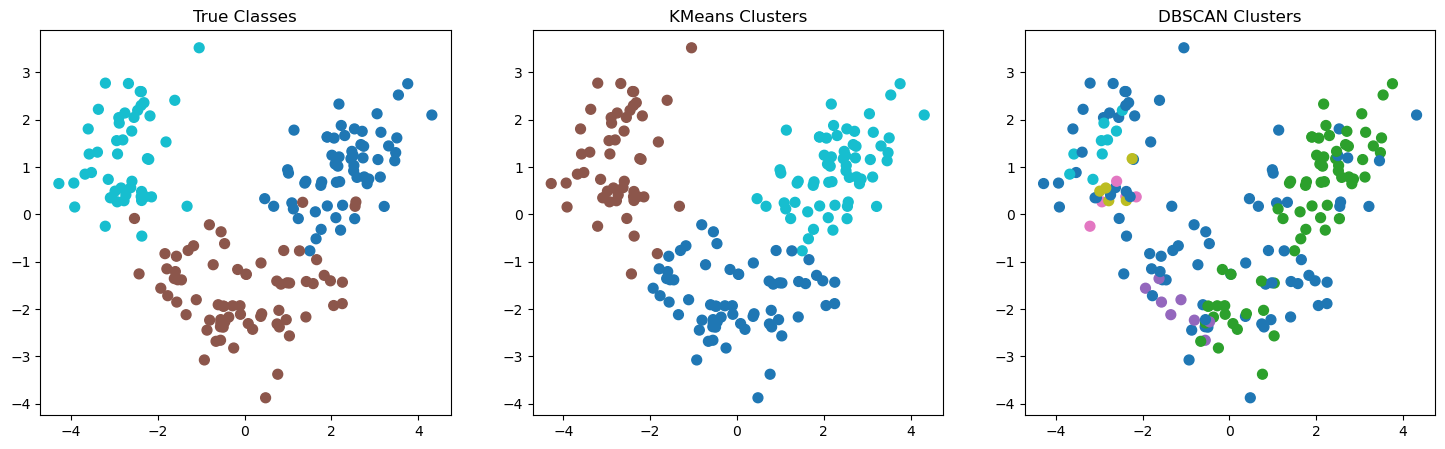

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# True labels
axes[0].scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', s=50)
axes[0].set_title("True Classes")

# KMeans
axes[1].scatter(X_2d[:,0], X_2d[:,1], c=y_clusters, cmap='tab10', s=50)
axes[1].set_title("KMeans Clusters")

# DBSCAN
axes[2].scatter(X_2d[:,0], X_2d[:,1], c=db_labels, cmap='tab10', s=50)
axes[2].set_title("DBSCAN Clusters")

plt.show()

#### K-means:
Works well if clusters are roughly spherical, equally sized, and linearly separable.  
It forces the data into k clusters even if the true structure is not k clusters.

### DBSCAN
Density-based, so it can find arbitrarily shaped clusters and can detect noise/outliers.  
No need to predefine the number of clusters.  
Works better if clusters are irregularly shaped or vary in density.

The dataset has well-separated classes (like Wine dataset).  
K-Means often produces clusters closer to true labels.